#**How to Train YOLOv12 Object Detection Model on a Custom Dataset**

**Step 01 # Install the Ultralytics Package**

In [ ]:
import os
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!nvidia-smi
%cd /content
%pip install ultralytics

home = os.getcwd()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import Image

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [ ]:
dataset_path = '/content/dataset'
!unzip -q /content/dataset.zip -d {dataset_path}
!echo {dataset_path}
!ls -lA {dataset_path}
print('-' * 80)
!cat {dataset_path}/data.yaml

/content/genre-2
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


**Step # 03 Fine-tune YOLOv12 model on a Custom Dataset**

We are now ready to fine-tune our YOLOv12 model. In the code below, we initialize the model using a starting checkpoint—here, we use `yolov12s.yaml`, but you can replace it with any other model (e.g., `yolov12n.pt`, `yolov12m.pt`, `yolov12l.pt`, or `yolov12x.pt`) based on your preference. We set the training to run for 50 epochs in this example; however, you should adjust the number of epochs along with other hyperparameters such as batch size, image size, and augmentation settings (scale, mosaic, mixup, and copy-paste) based on your hardware capabilities and dataset size.

**Note:** **Note that after training, you might encounter a `TypeError: argument of type 'PosixPath' is not iterable error` — this is a known issue, but your model weights will still be saved, so you can safely proceed to running inference.**

In [ ]:
# choose one:
model = YOLO("yolo12n.pt")
#model = YOLO("yolo12s.pt")
#model = YOLO("yolo12m.pt")
#model = YOLO("yolo12l.pt")
#model = YOLO("yolo12x.pt")

results = model.train(data=f'{dataset_path}/data.yaml', epochs=50)

100%|██████████| 18.1M/18.1M [00:00<00:00, 220MB/s]


**Step # 04 Evaluate fine-tuned YOLOv12 model**

In [ ]:
train_nr = ''
!ls {home}/runs/detect/train{train_nr}/

args.yaml			 R_curve.png	      train_batch8102.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2.jpg     val_batch2_labels.jpg
P_curve.png			 train_batch8100.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch8101.jpg  weights


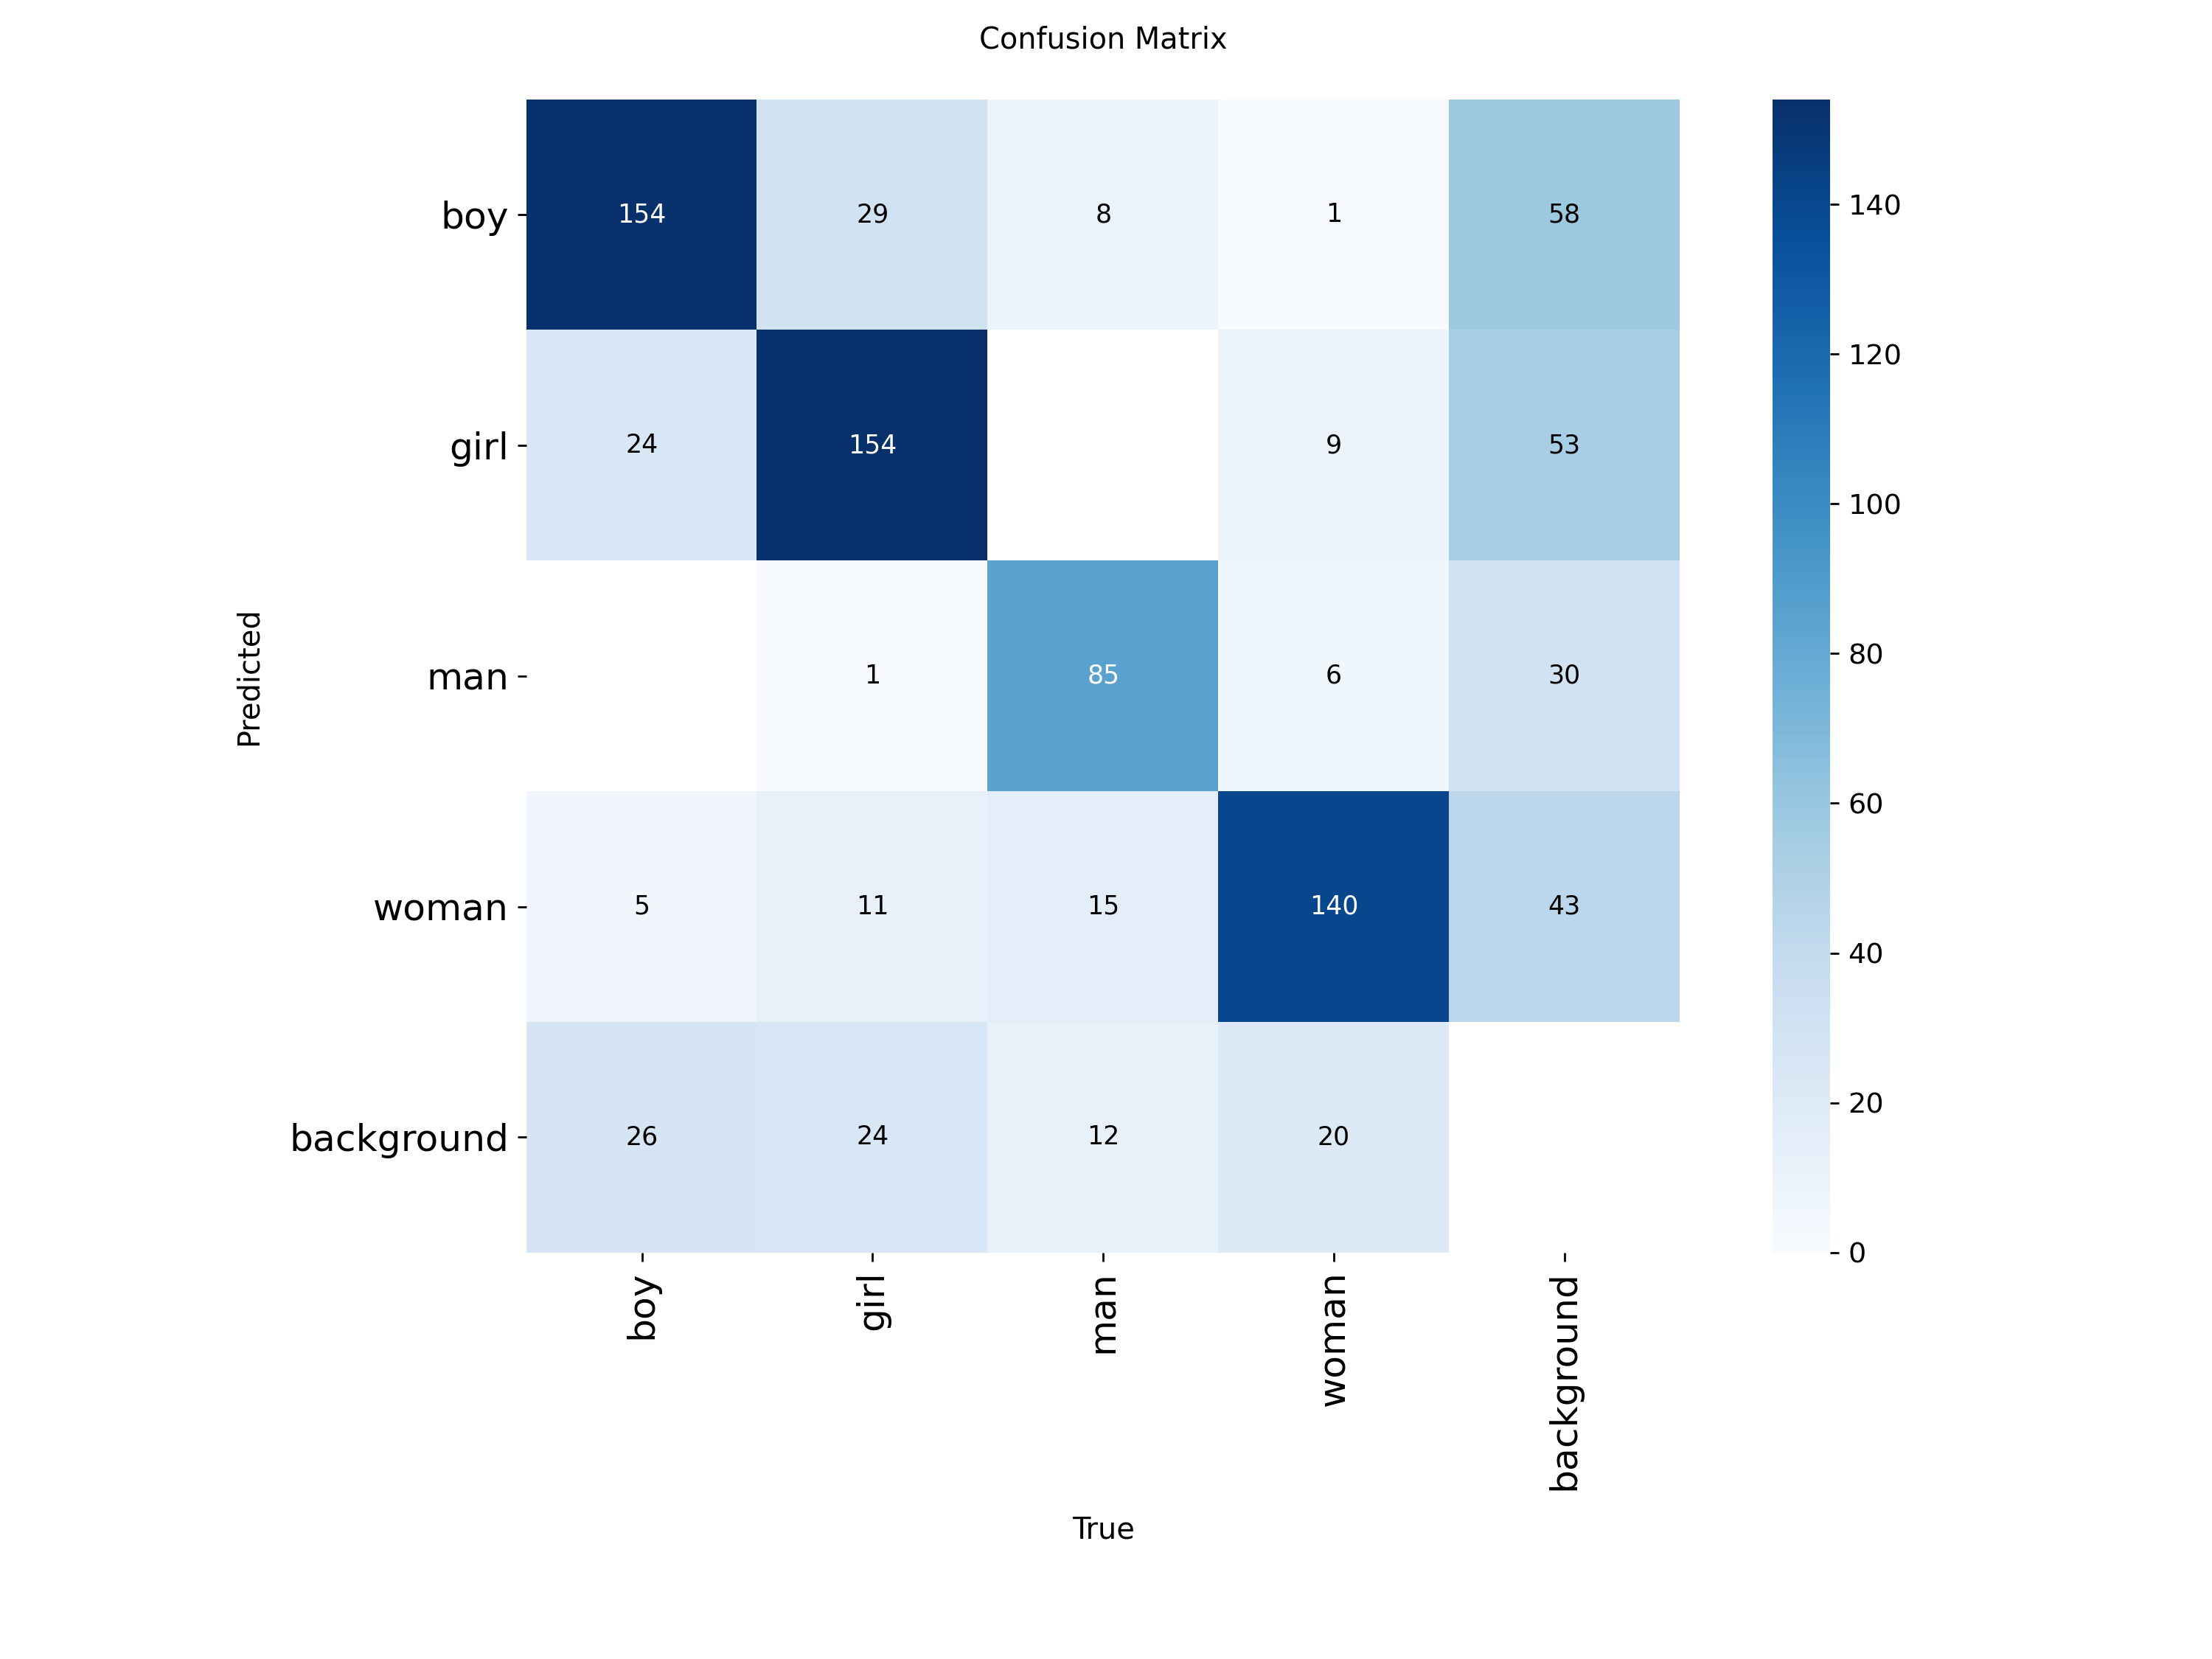

In [ ]:
Image(filename=f'{home}/runs/detect/train{train_nr}/confusion_matrix.png', width=1000)

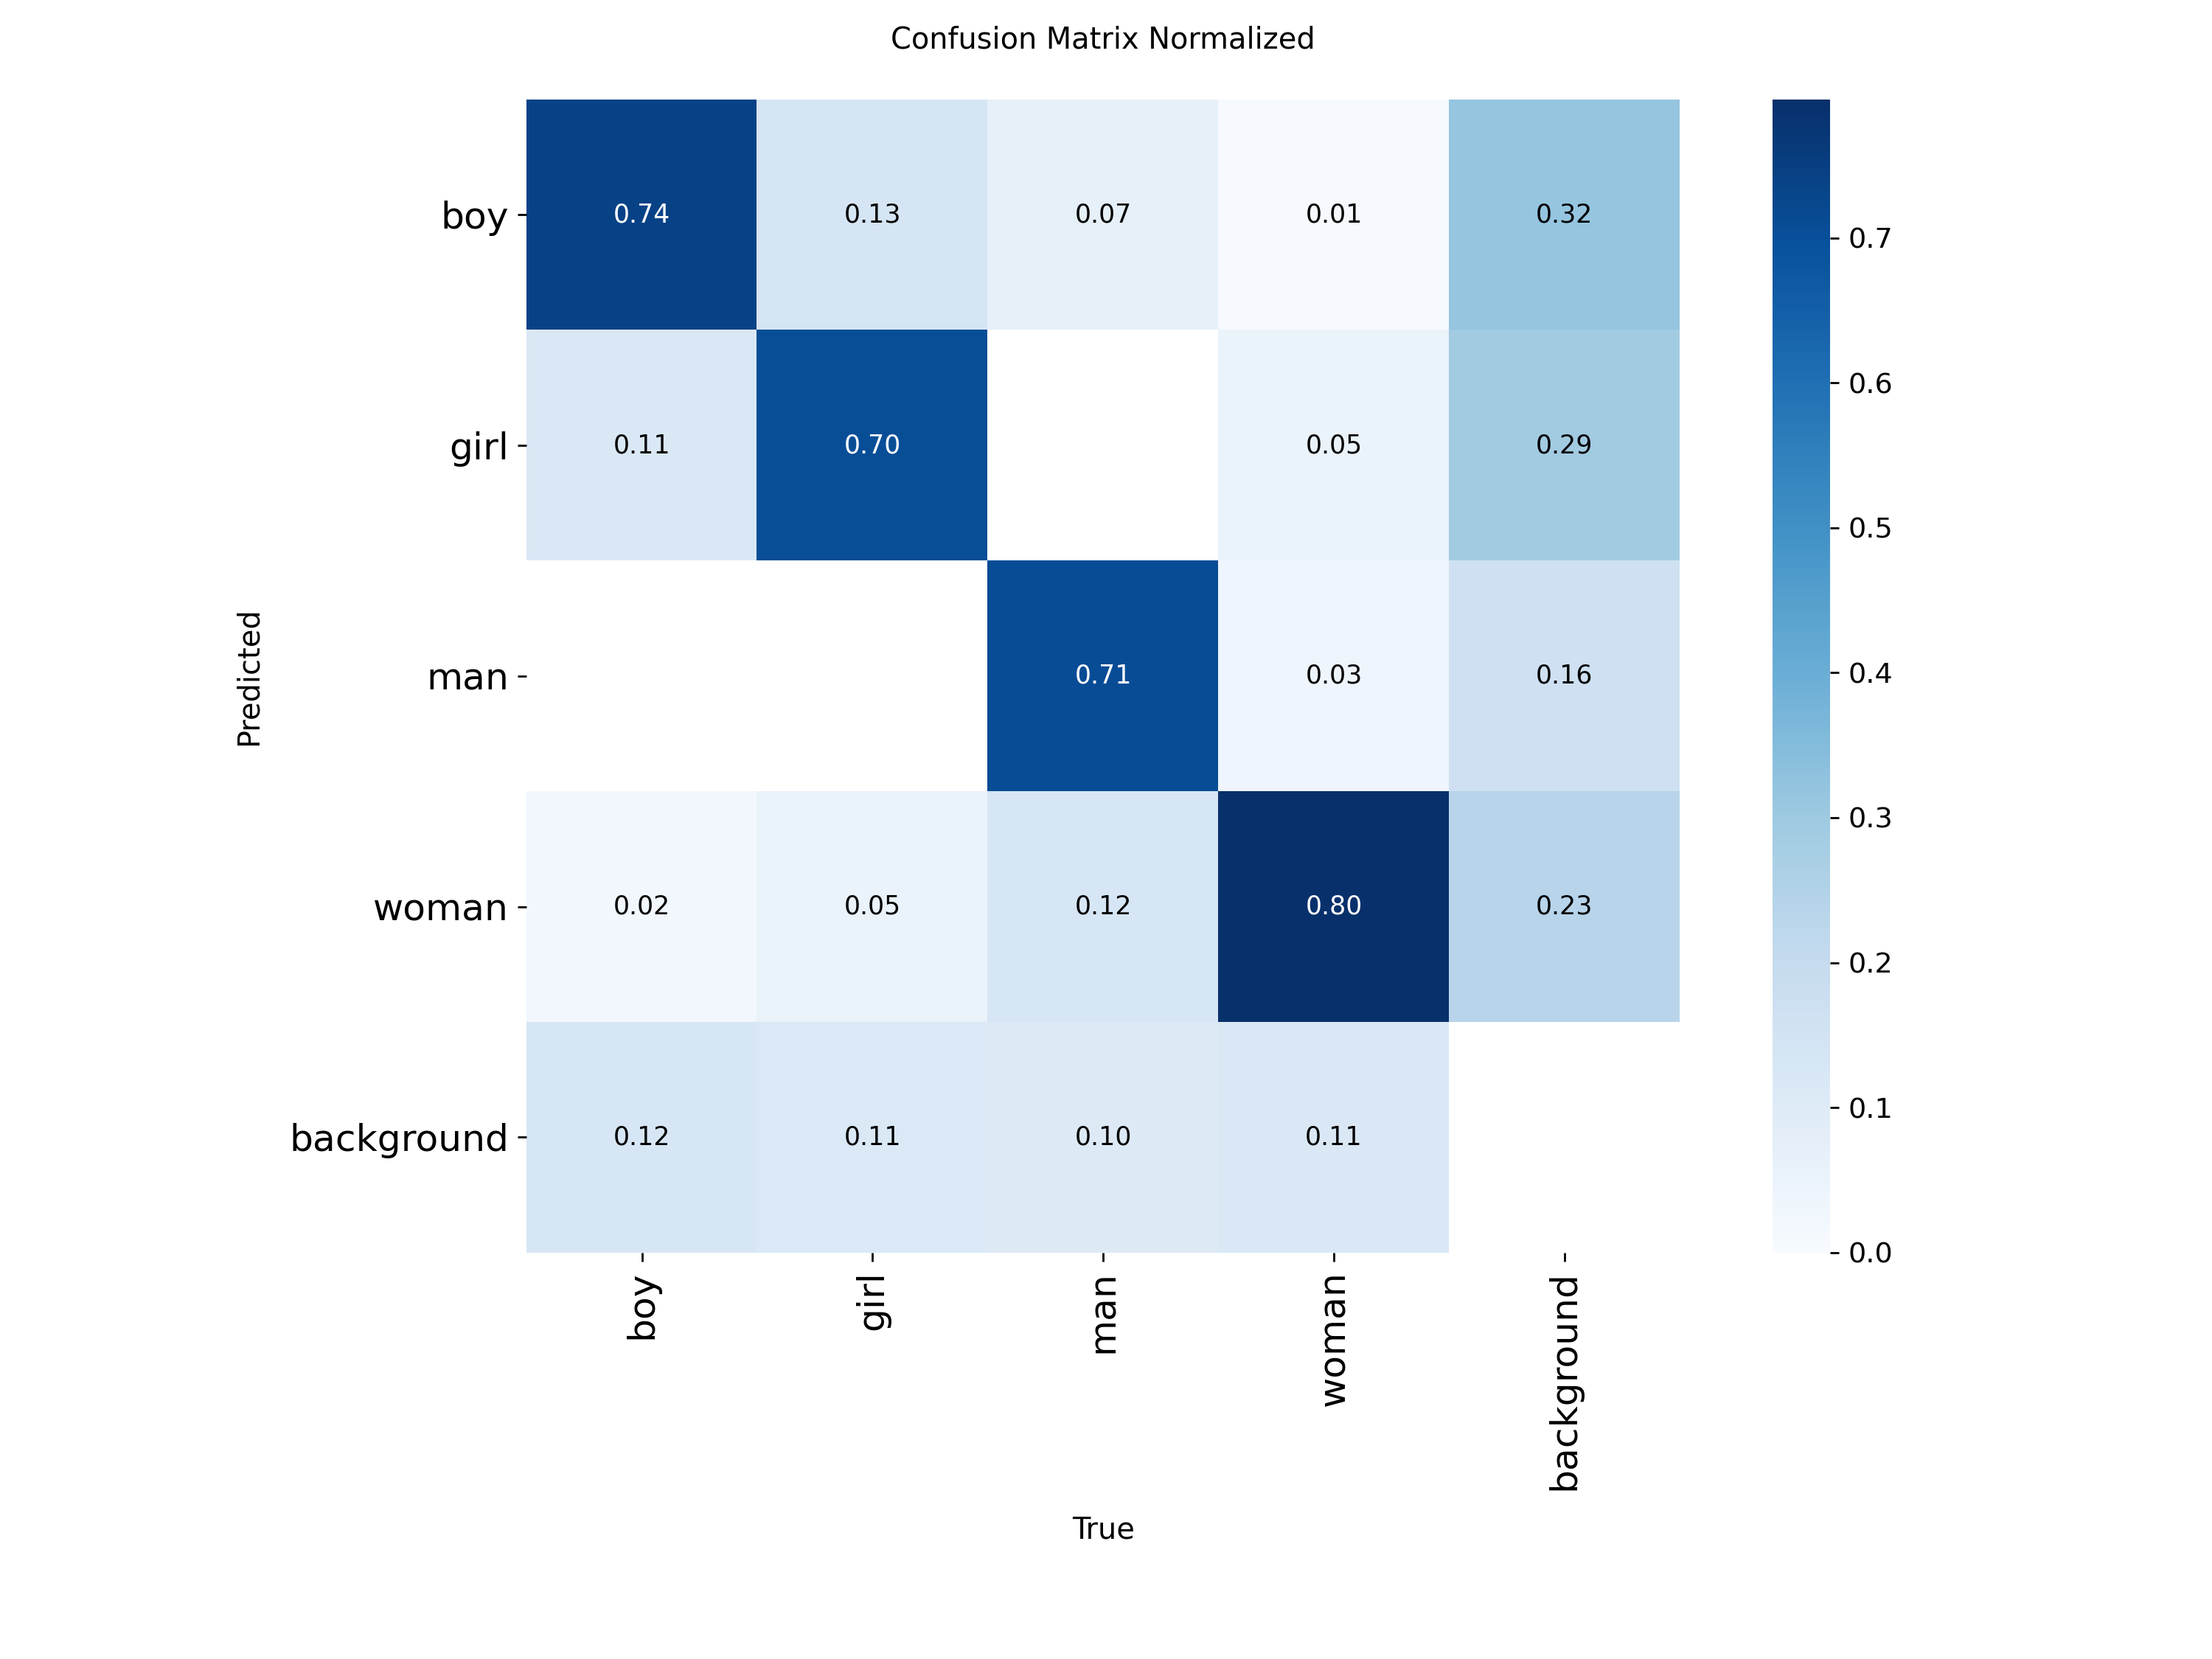

In [ ]:
Image(filename=f'{home}/runs/detect/train{train_nr}/confusion_matrix_normalized.png', width=1000)

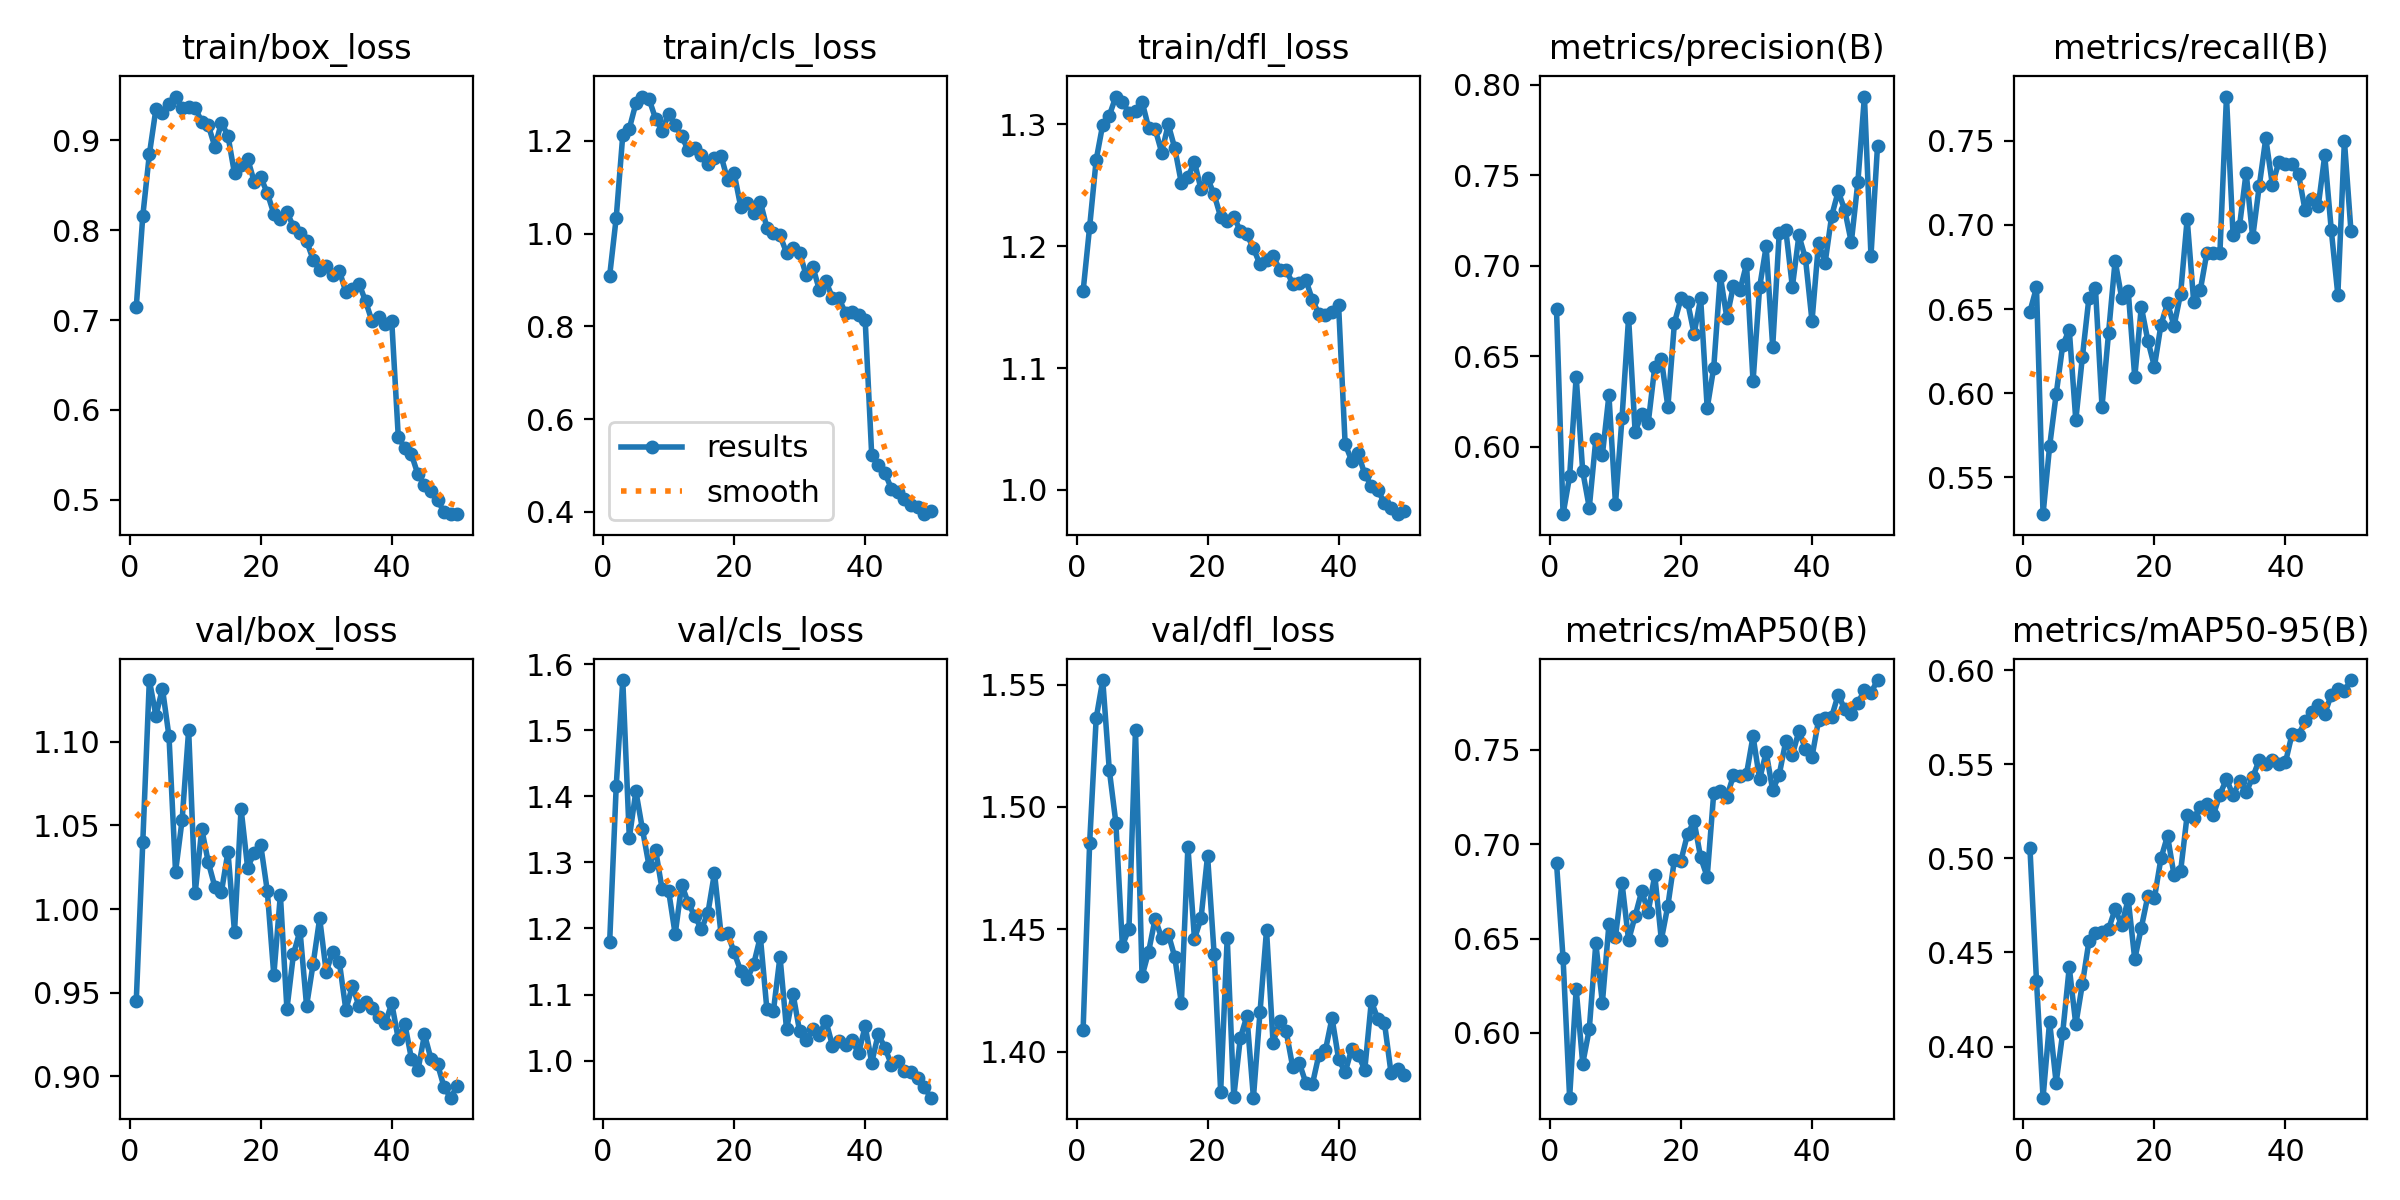

In [ ]:
Image(filename=f'{home}/runs/detect/train{train_nr}/results.png', width=1000)

Precision = TP / (TP + FP)

Precision is simply true positives out of total detections.


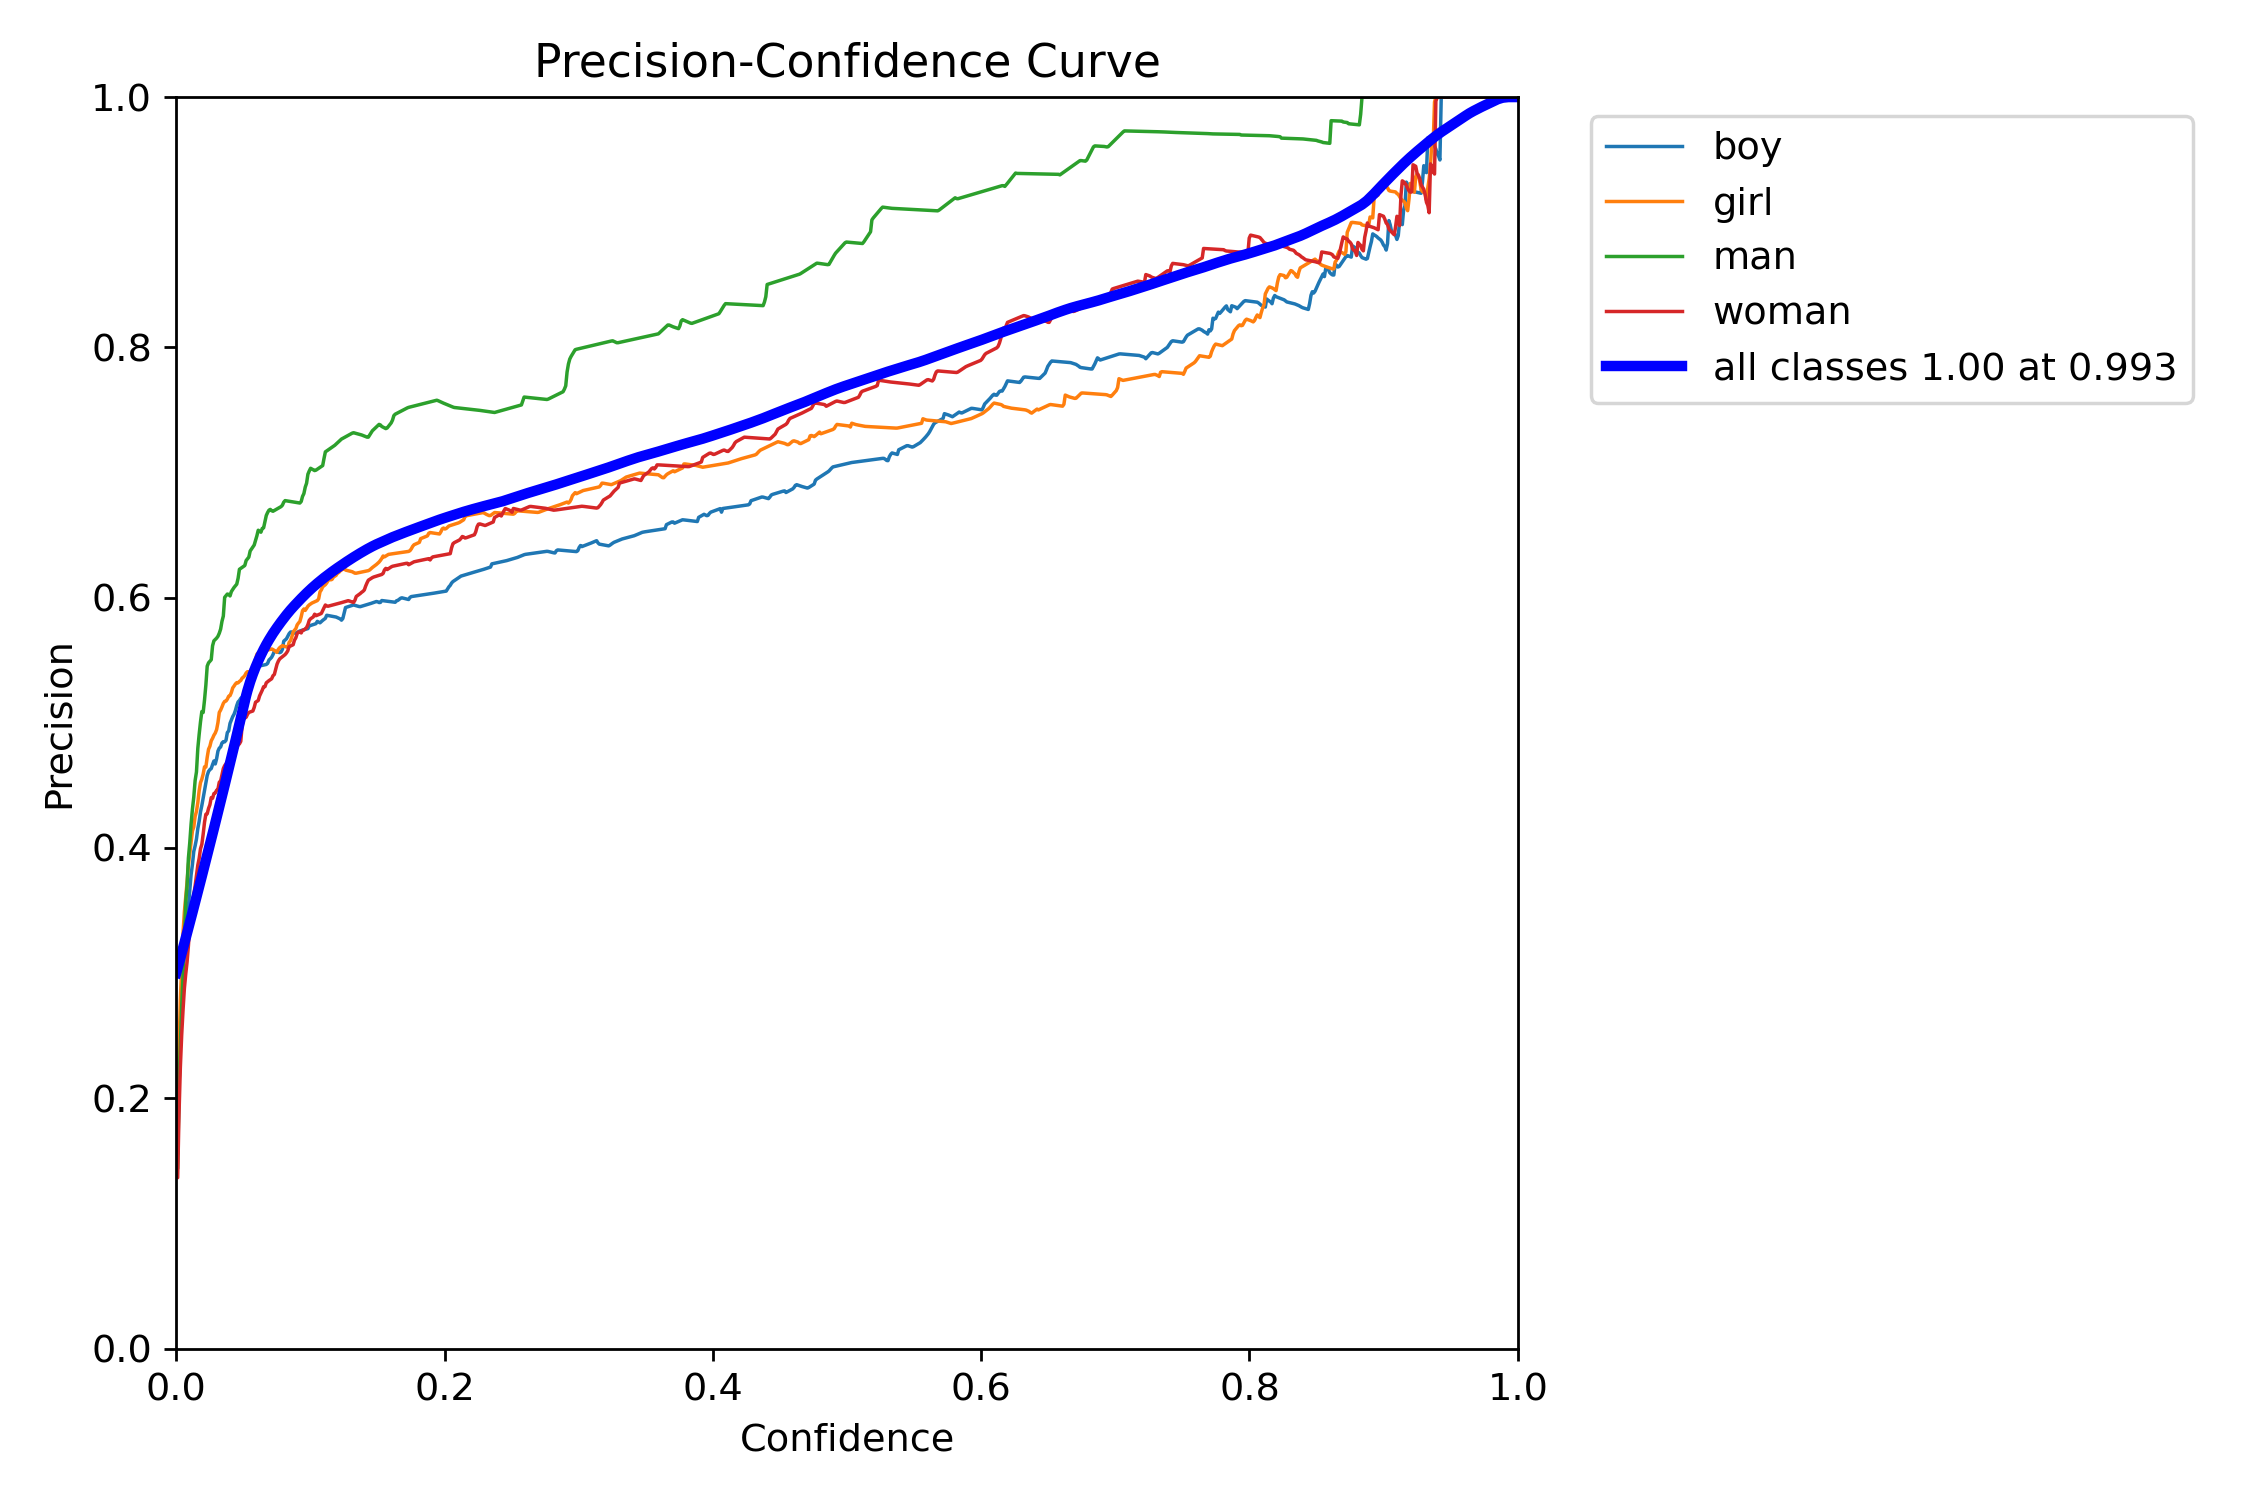

In [ ]:
Image(filename=f'{home}/runs/detect/train{train_nr}/P_curve.png', width=1000)

Recall = TP / (TP + FN)

Recall is the True Positive out of all Ground Truths

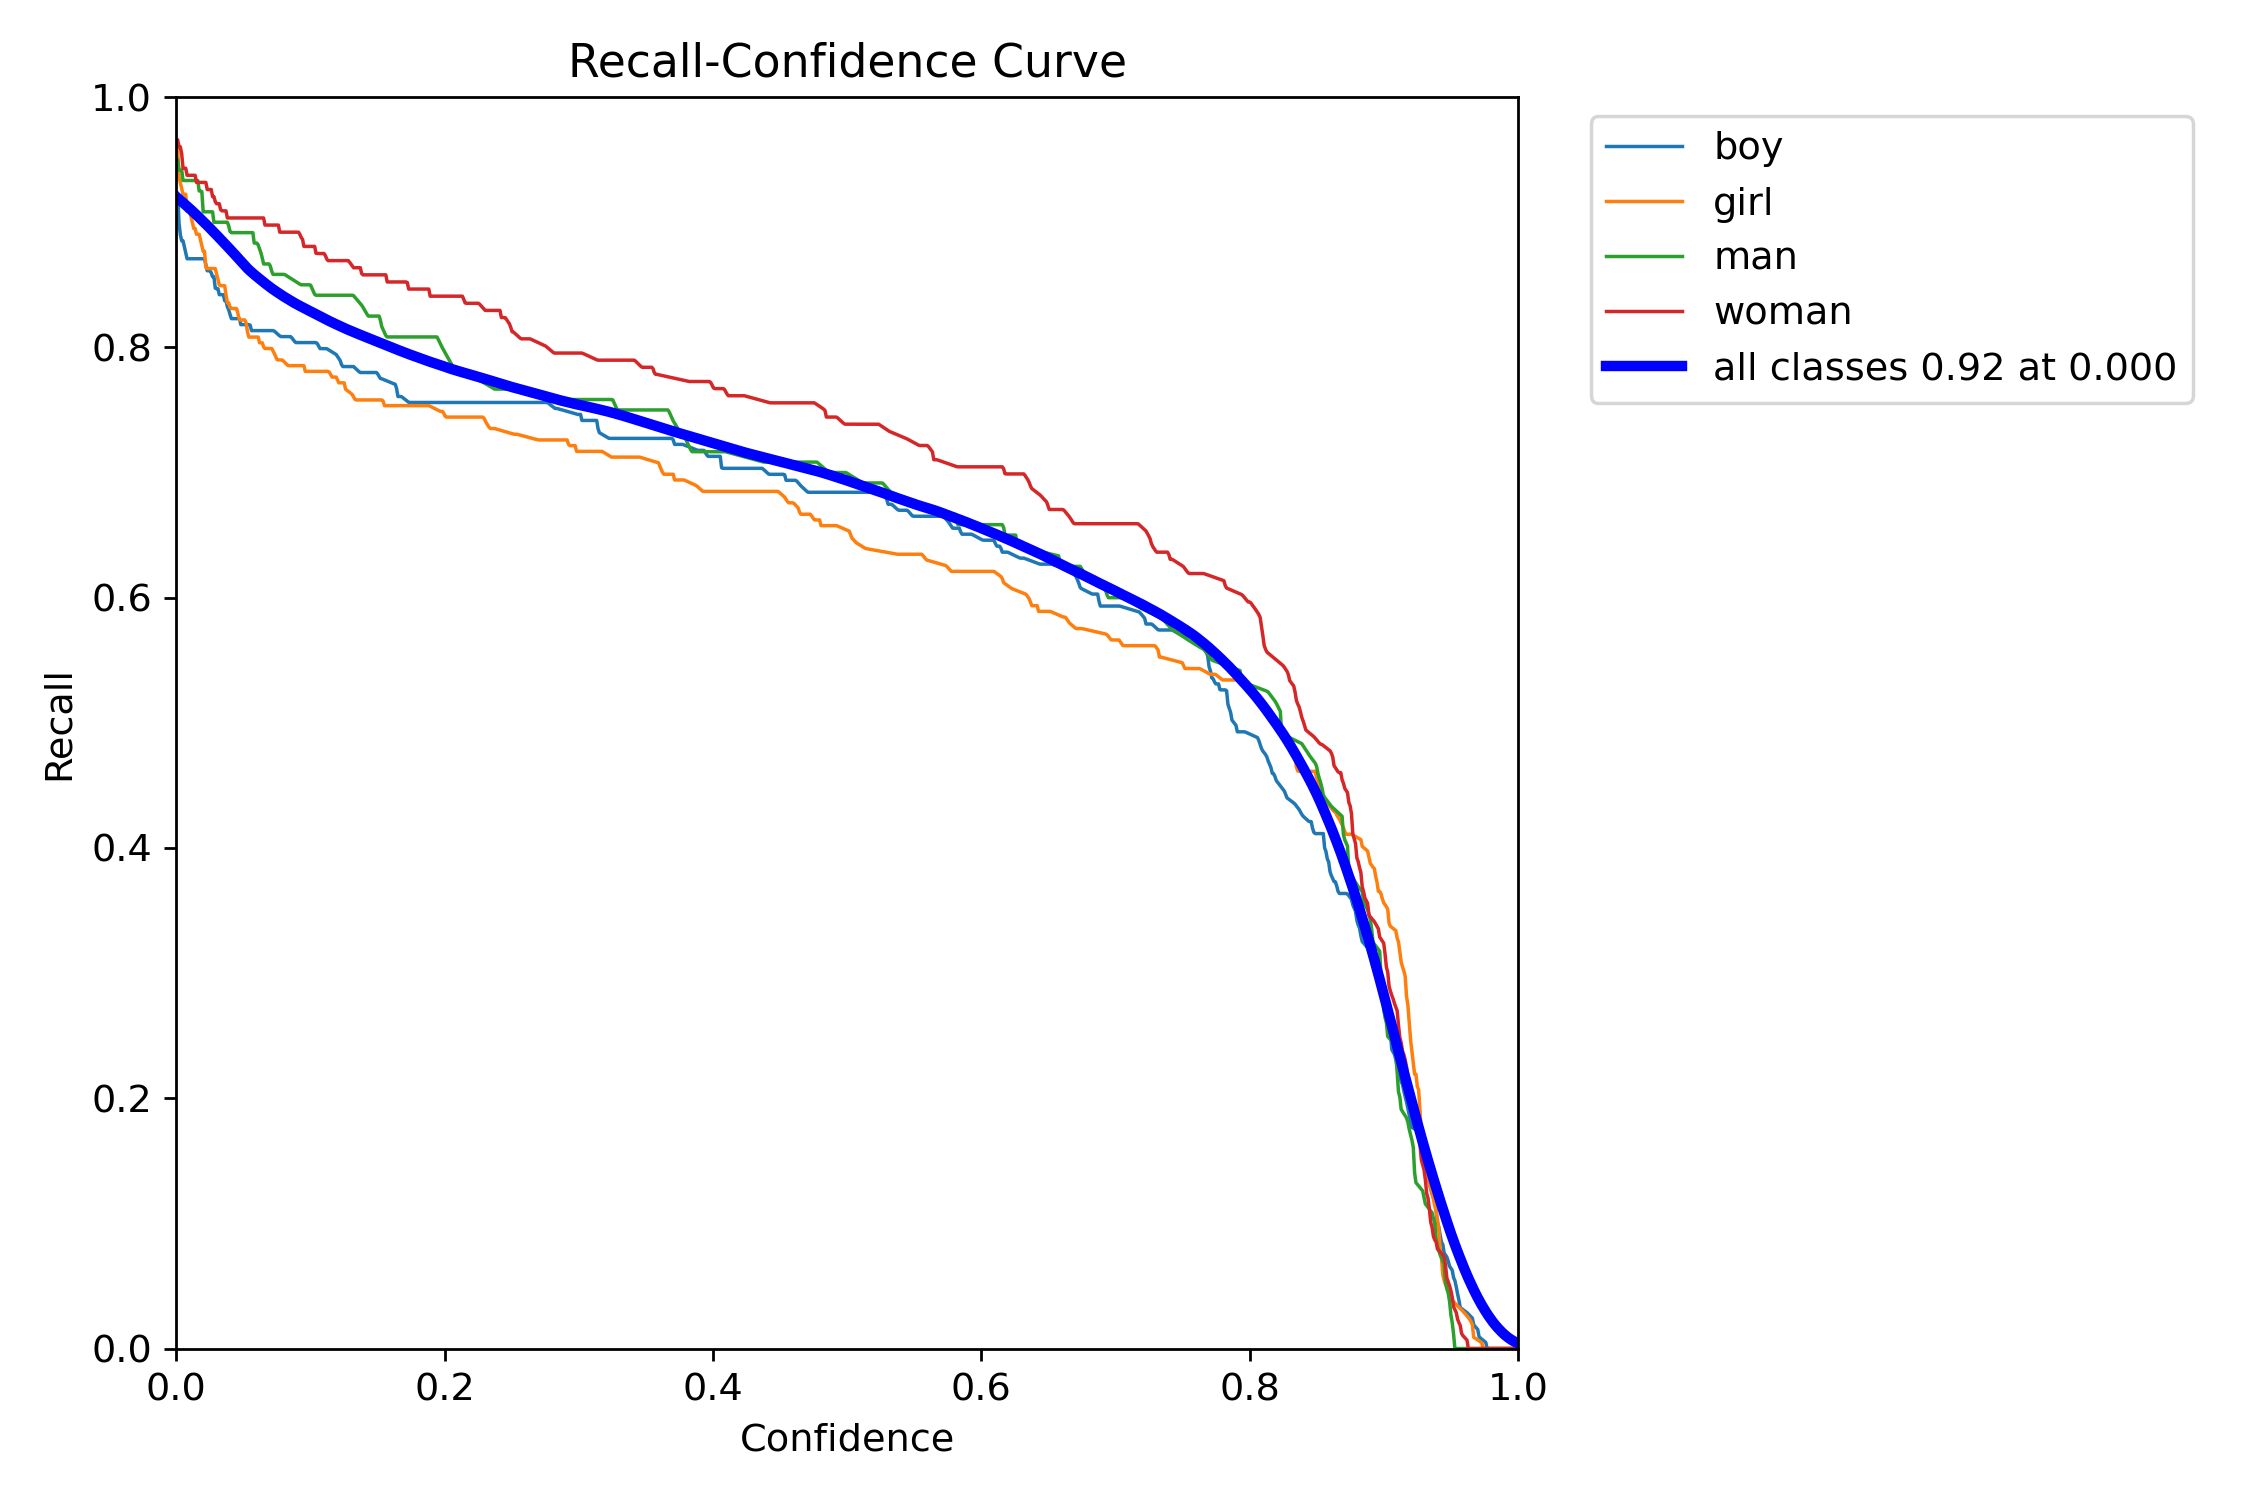

In [ ]:
Image(filename=f'{home}/runs/detect/train{train_nr}/R_curve.png', width=1000)

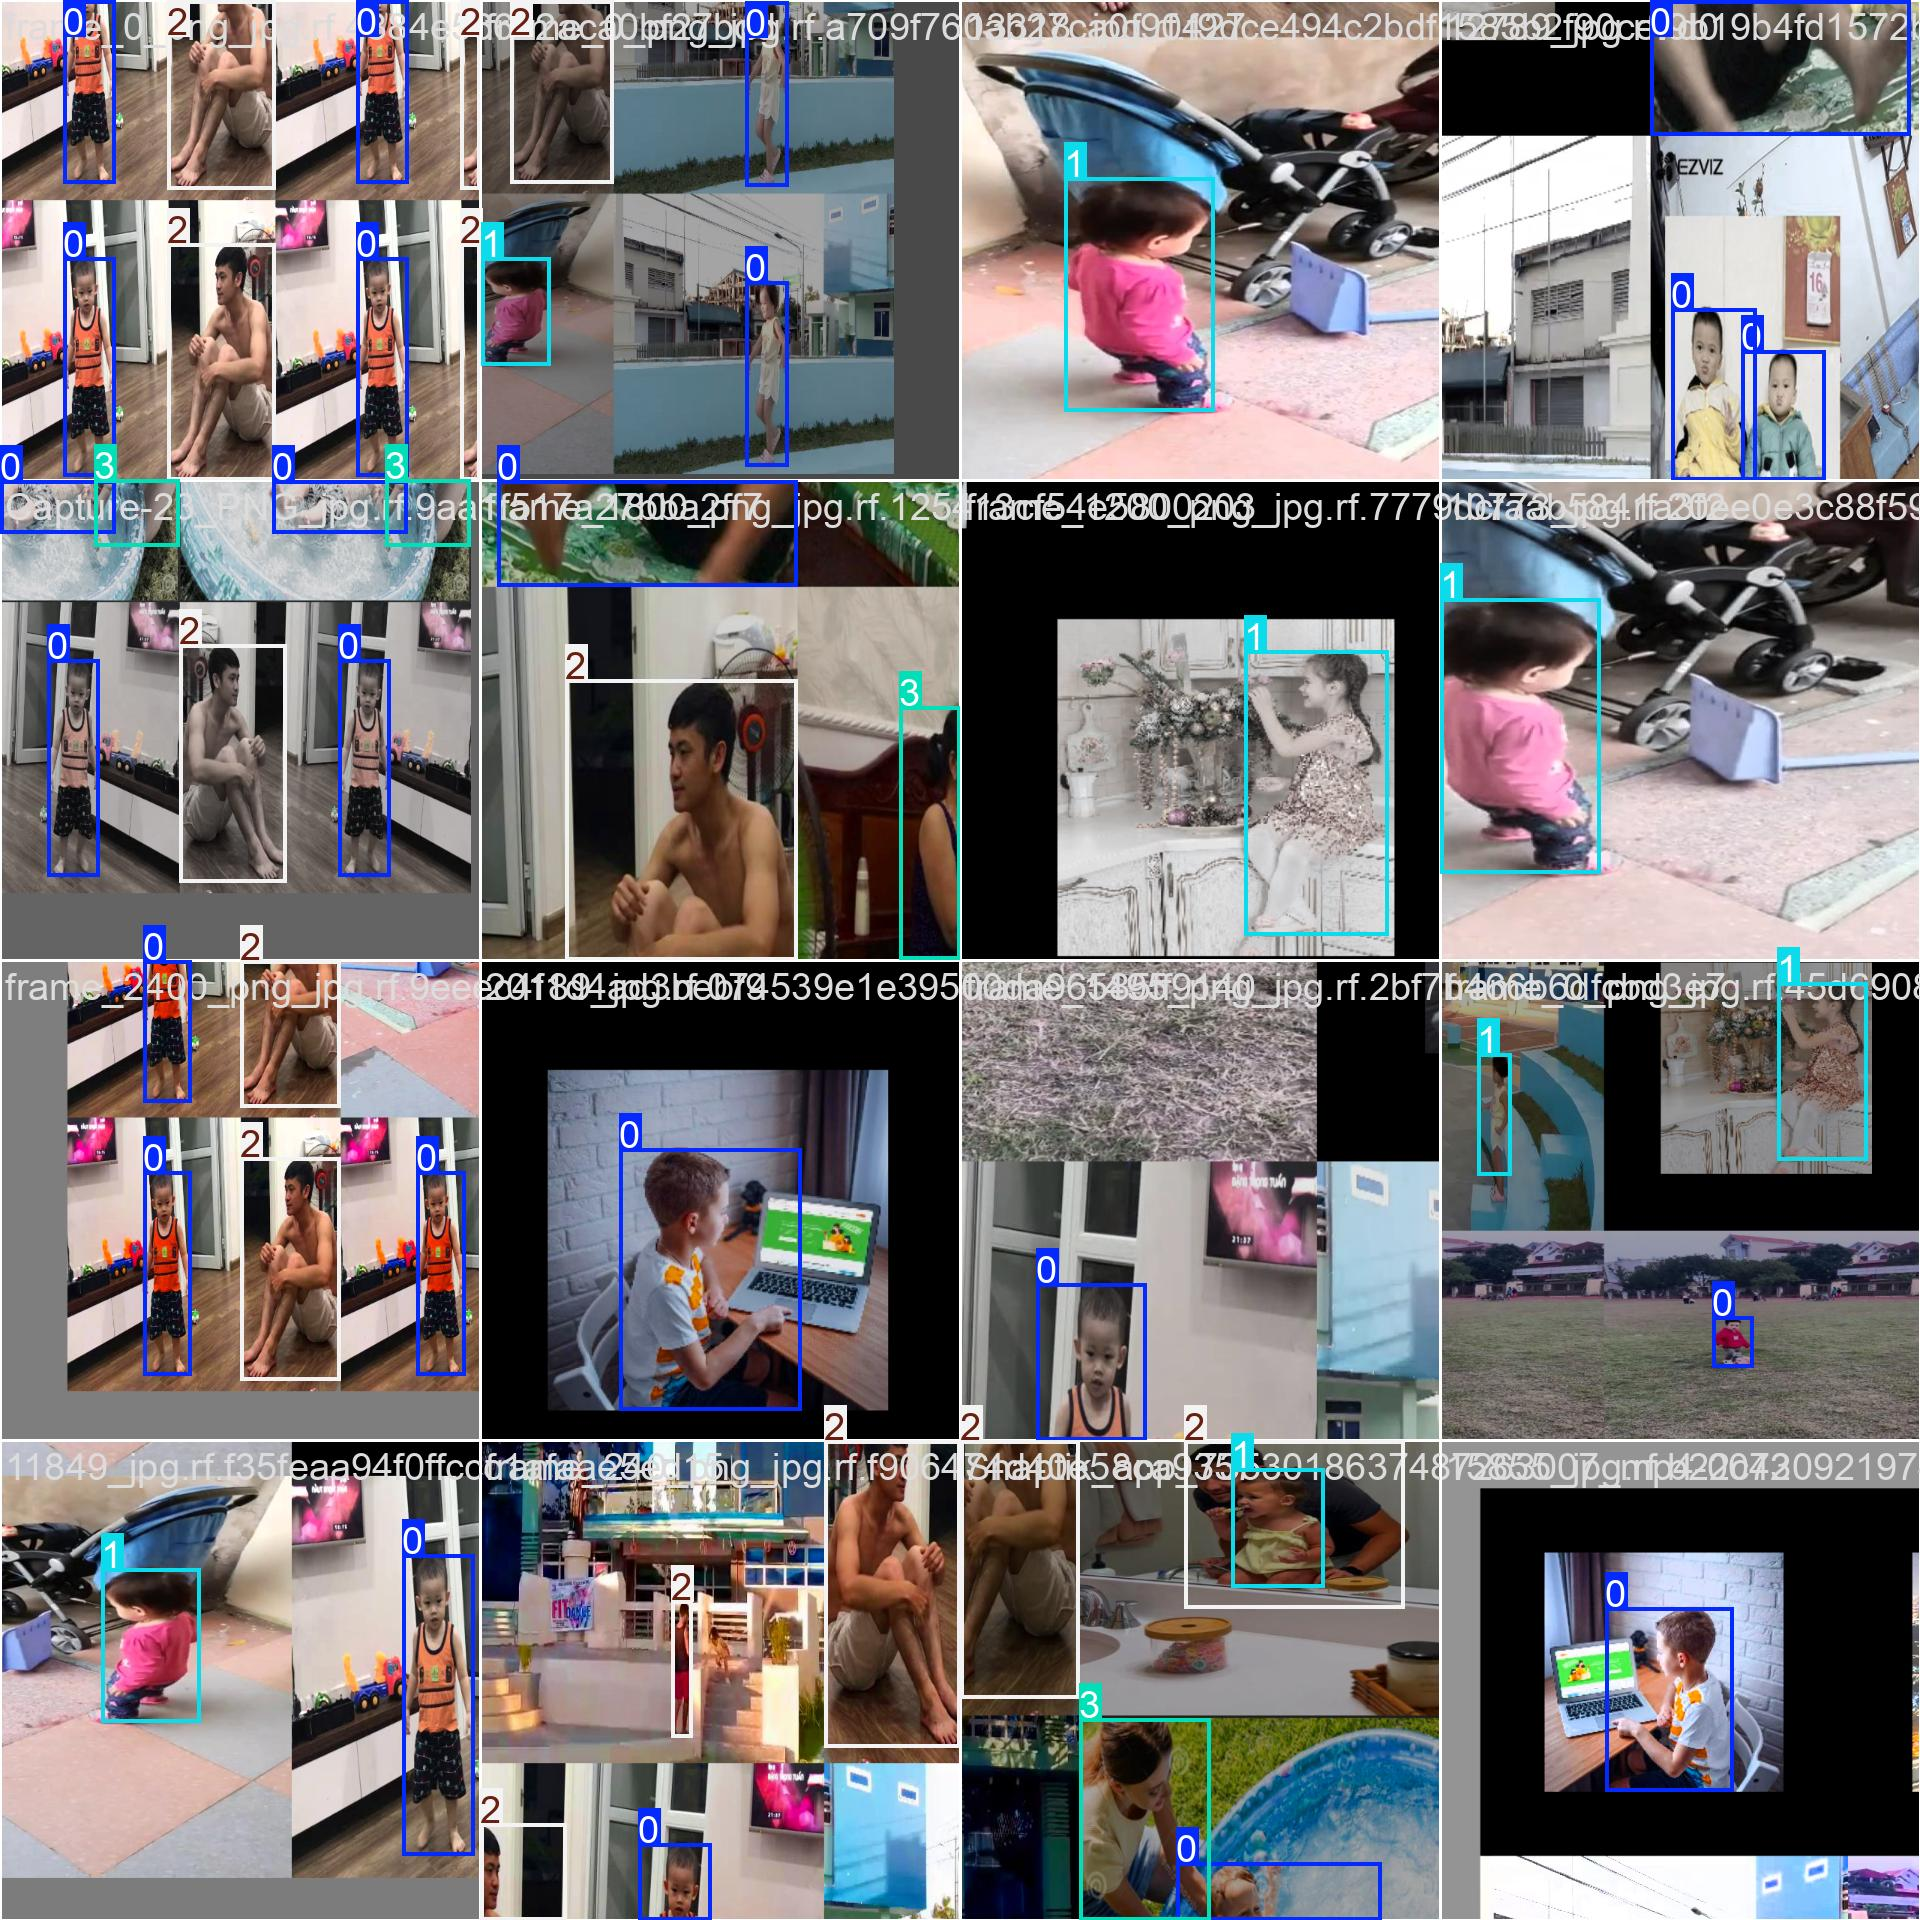

In [ ]:
Image(filename=f'{home}/runs/detect/train{train_nr}/train_batch0.jpg', width=1000)

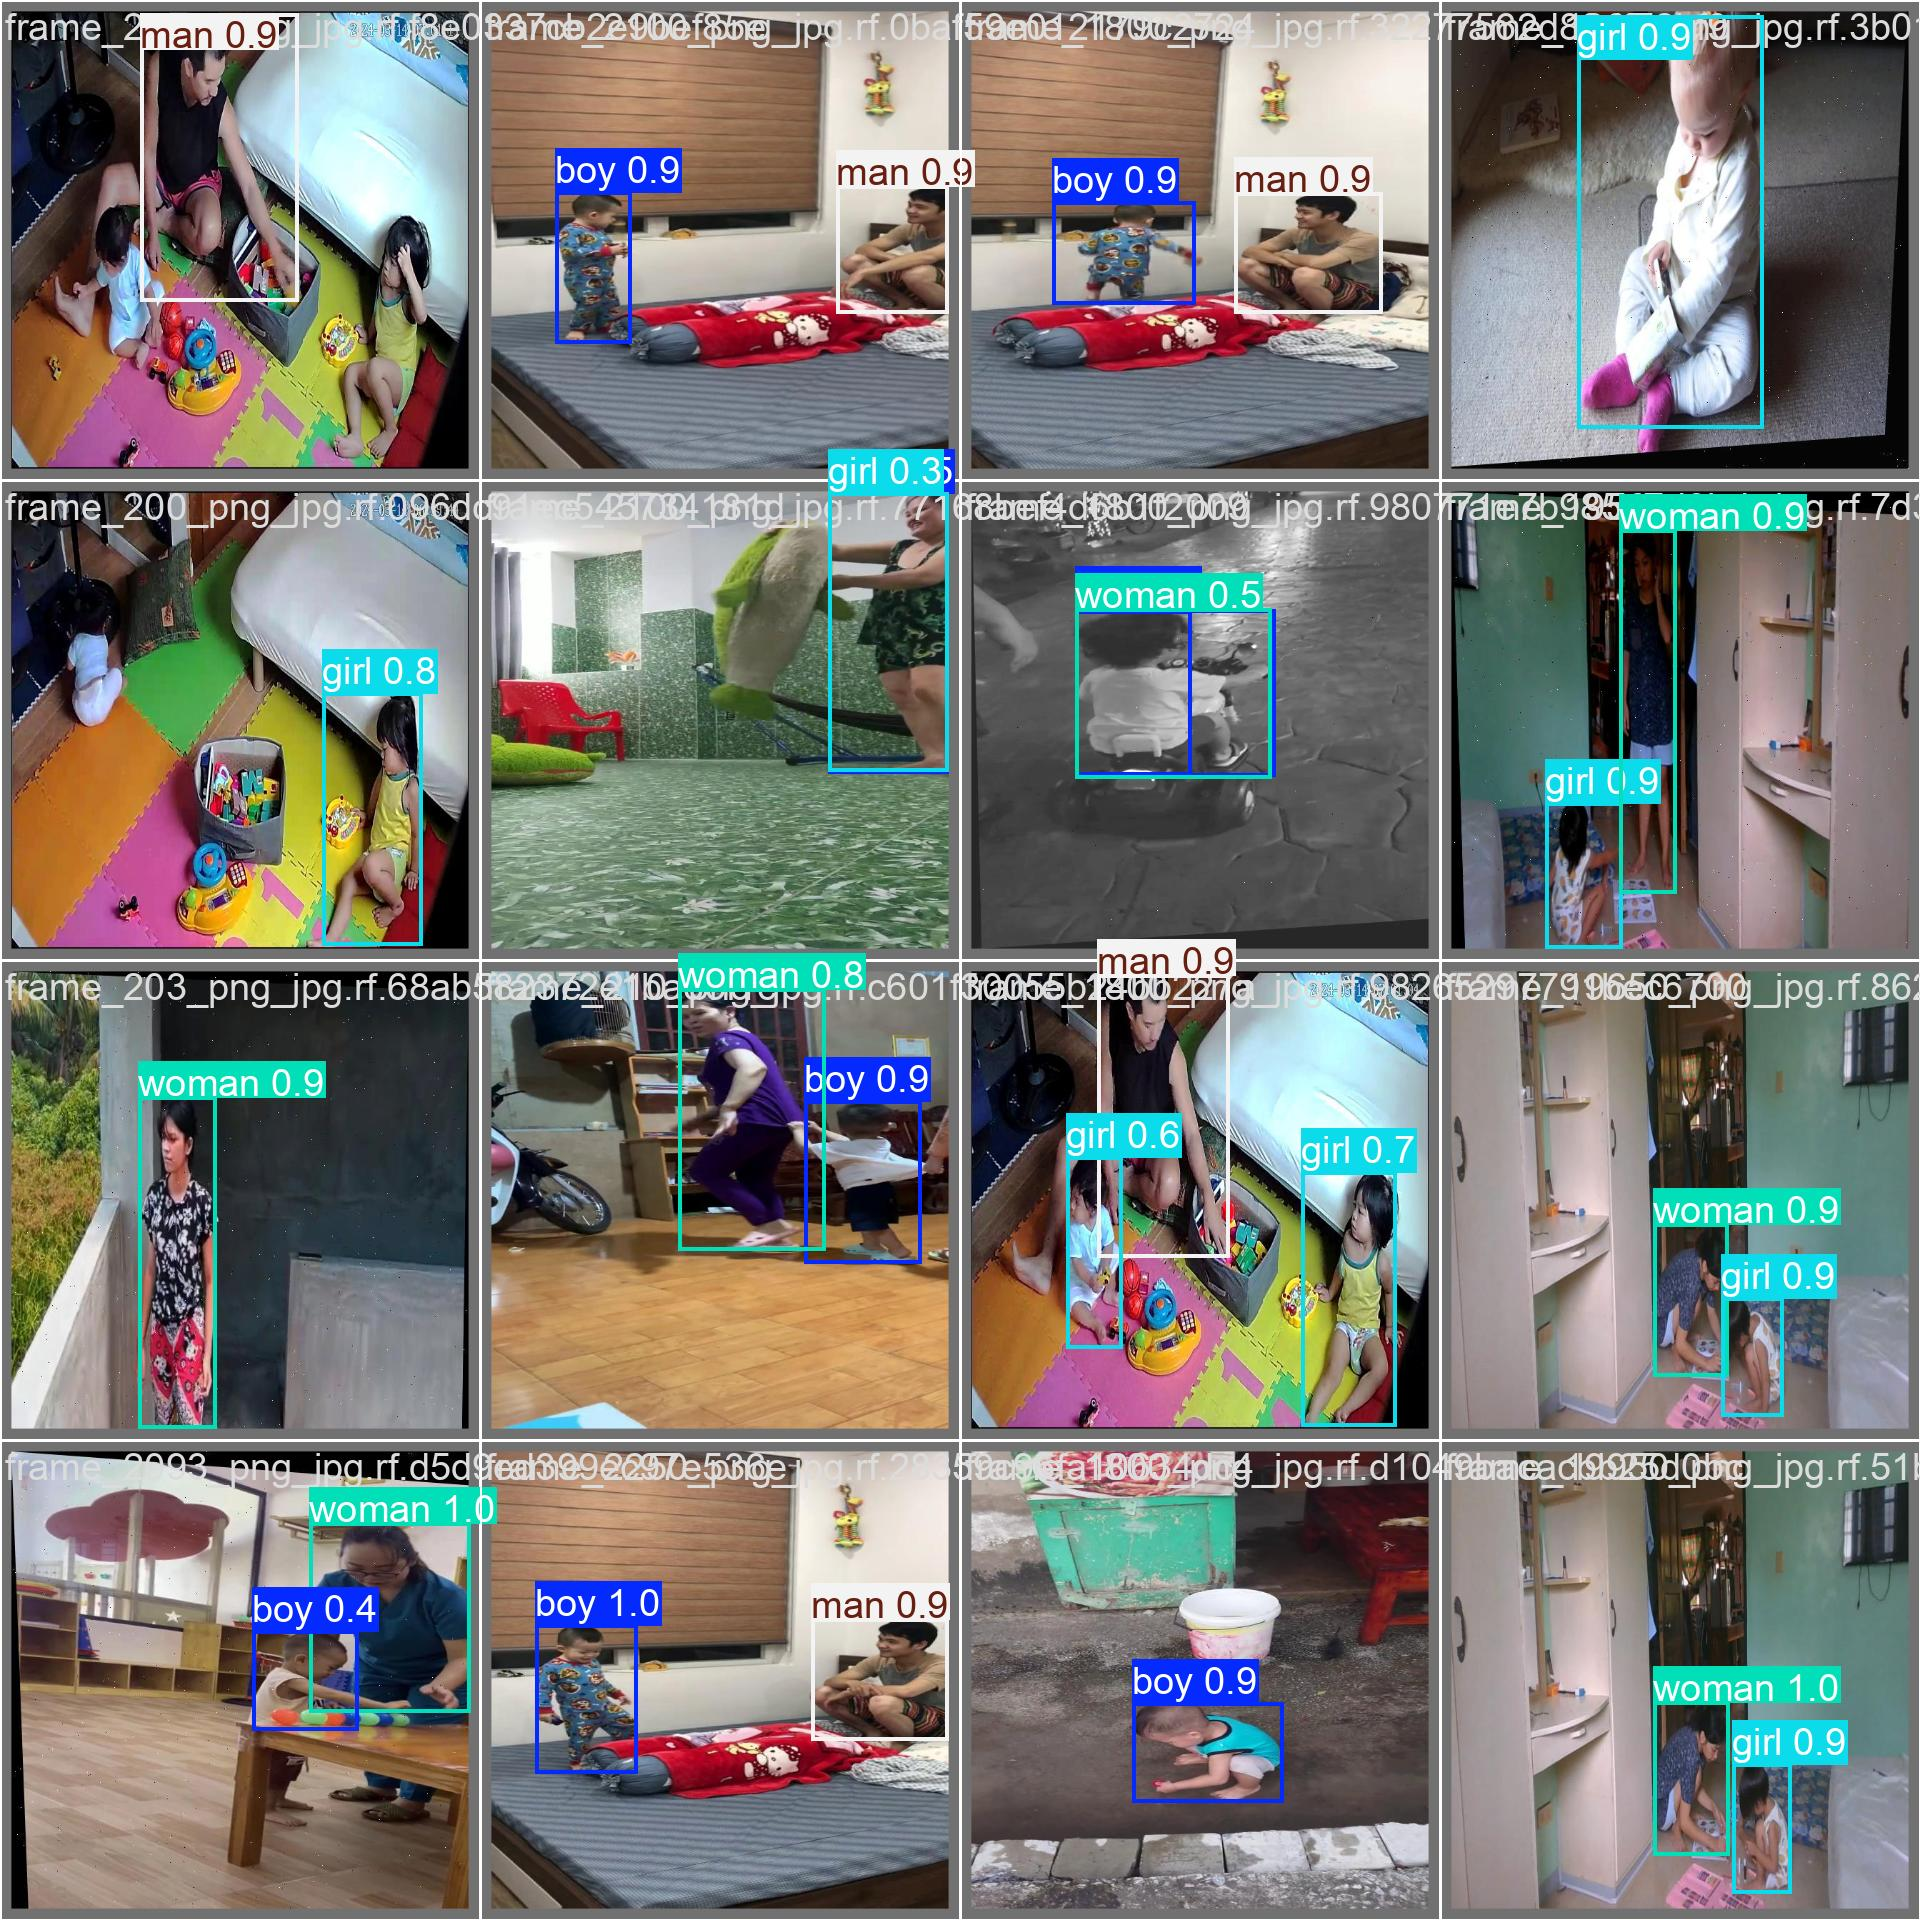

In [ ]:
Image(filename=f'{home}/runs/detect/train{train_nr}/val_batch0_pred.jpg', width=1000)

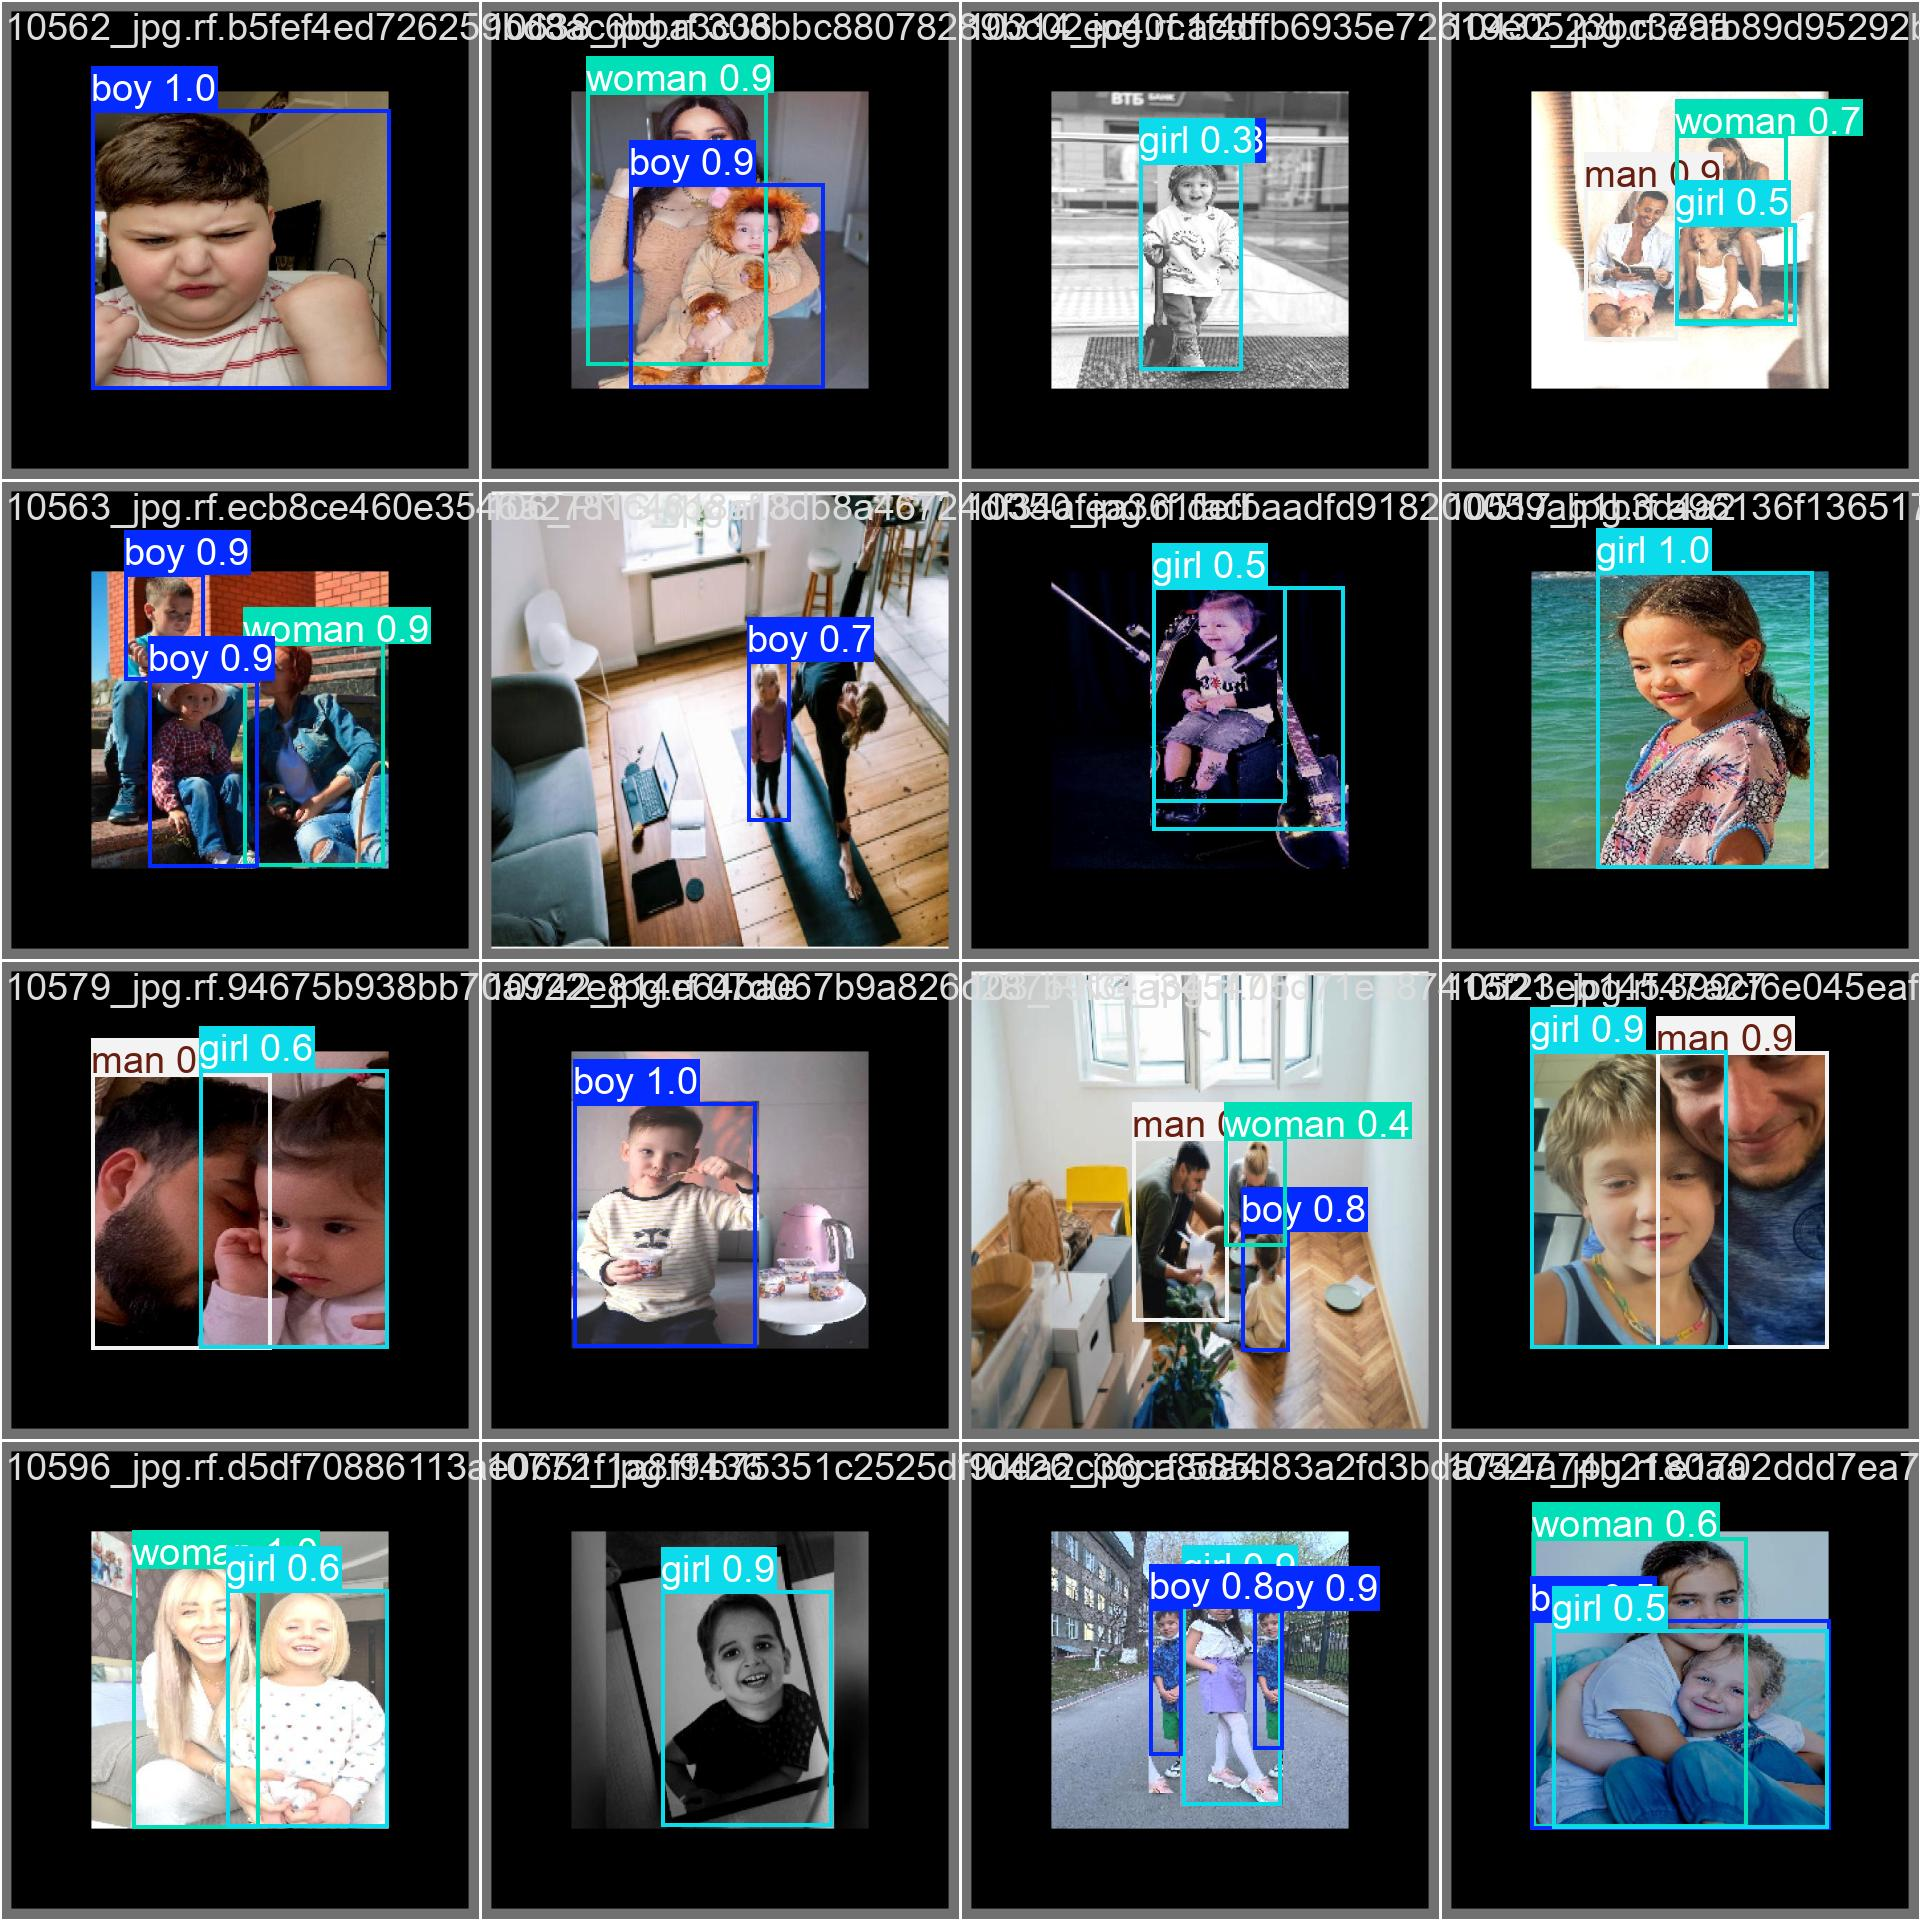

In [ ]:
Image(filename=f'{home}/runs/detect/train{train_nr}/val_batch1_pred.jpg', width=1000)

**Step # 05  Validate Fine-Tuned Model**

In [ ]:
best_model = f'{home}/runs/detect/train{train_nr}/weights/best.pt'
model = YOLO(best_model)

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,232,428 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1385.7±345.3 MB/s, size: 33.5 KB)


val: Scanning /content/genre-2/valid/labels.cache... 409 images, 1 backgrounds, 0 corrupt: 100%|██████████| 409/409 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 722, len(boxes) = 724. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.89it/s]


                   all        409        724      0.766      0.699      0.789      0.595
                   boy        180        209      0.705      0.689      0.737      0.548
                  girl        195        219      0.735      0.658      0.756      0.585
                   man        114        120      0.866        0.7       0.86      0.654
                 woman        172        176      0.758      0.747      0.801      0.591
Speed: 1.6ms preprocess, 13.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val3


array([    0.54847,     0.58477,     0.65395,     0.59125])

**Step # 06 Inference with Custom Model on Images**

In [ ]:
results = model.predict(source = f"{dataset_path}/test/images", save = True)


image 1/205 /content/genre-2/test/images/10000000_7505963559480713_8606382332440427413_n_mp4-0017_jpg.rf.71009603f7ebed3f1fd9118bbfb07340.jpg: 640x640 1 boy, 1 woman, 20.9ms
image 2/205 /content/genre-2/test/images/10000000_7505963559480713_8606382332440427413_n_mp4-0018_jpg.rf.b5817a28c6d76a49ab405d2238cf5486.jpg: 640x640 1 boy, 1 woman, 20.9ms
image 3/205 /content/genre-2/test/images/10000000_7505963559480713_8606382332440427413_n_mp4-0034_jpg.rf.83d626d12f00a0aeac548fe31fb6e57b.jpg: 640x640 1 boy, 1 woman, 21.0ms
image 4/205 /content/genre-2/test/images/10000000_7505963559480713_8606382332440427413_n_mp4-0035_jpg.rf.875830bec084a8417fa68506b92245c8.jpg: 640x640 1 boy, 1 woman, 21.0ms
image 5/205 /content/genre-2/test/images/10000000_7505963559480713_8606382332440427413_n_mp4-0036_jpg.rf.fde38523f937921549d03bc631298ba5.jpg: 640x640 1 boy, 1 woman, 20.9ms
image 6/205 /content/genre-2/test/images/10000000_7505963559480713_8606382332440427413_n_mp4-0038_jpg.rf.92da663799cc1dabddbc7778

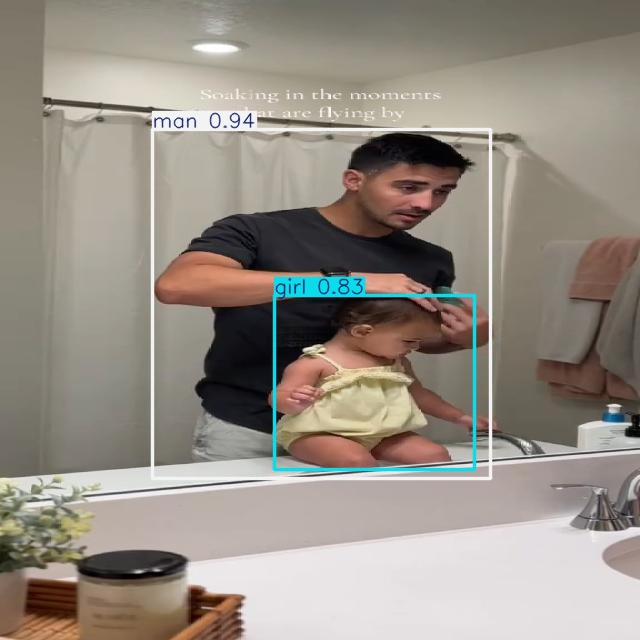

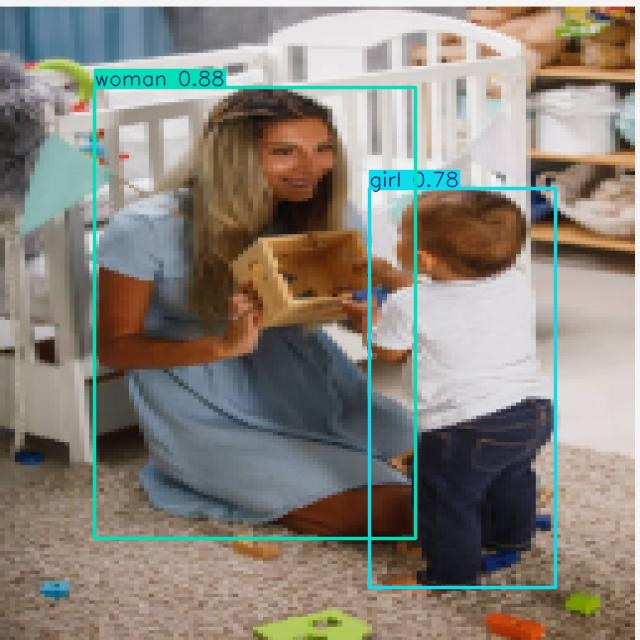

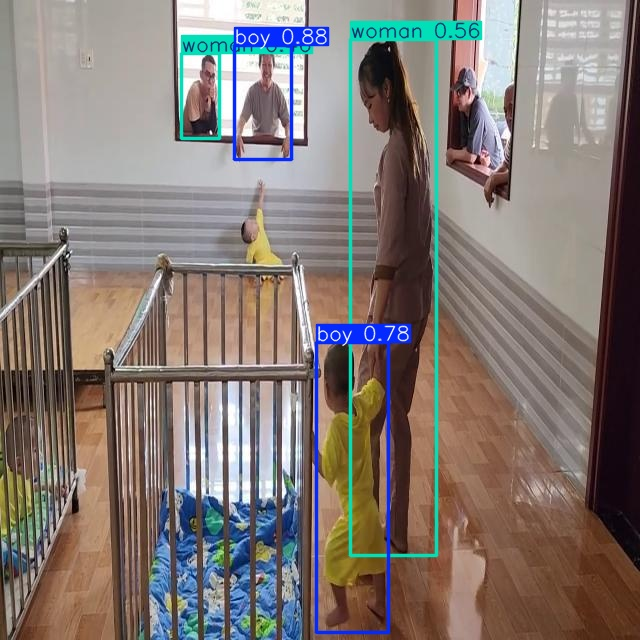

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{home}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*')[2:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
import shutil
shutil.make_archive('genre-2', 'zip', 'genre-2')

'/content/genre-2.zip'